## Данные:
Main ID - Основной идентификатор\
Incident ID - Идентификатор инцидента\
Region - Регион\
Incident Date -Дата инцидента\
Year - Год\
Reported Month - Отчетный месяц\
Number Dead - Число погибших\
Minimum Estimated Number of Missing - Минимальное предполагаемое число пропавших без вести\
Total Number of Dead and Missing - Общее число погибших и пропавших без вести\
Number of Survivors - Число выживших\
Number of Females - Количество женщин\
Number of Males - Количество мужчин\
Number of Children - Колличество детей\
Cause of Death - Причина смерти\
Location of death - Место смерти\
Information Source - Источник информации\
Coordinates - Координаты\
Migrantion route - Маршрут миграции\
URL\
UNSD Geographical Grouping - Географическая группировка\
Source Quality - Качество источника

## Задачи:
Узнать регион с наибольшим колличеством инцендентов за весь период\
Рассмотреть распределение инцендентов по годам у второго региона в списке регионов с наибольшим кол-вом инцендентов\
Рассмотреть распределение инцендентов по месяцам годам с пиковыми значеними\
Рассмотреть распределения по месяцам и местам с наиболбшим кол-вом жертв\
Рассмотреть причины смерти участников инцендентов в местах набольшего числа жертв за период\
Сопоставить данные исследуемых годов и сделать вывод\
Провести A/B тест среднего кол-ва жертв мужчин и женщин среди всех инцендентов во втором регионе в одном из пиковых годов


In [4]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import warnings

warnings.filterwarnings('ignore')

sns.set(font_scale = 1.5, style = 'darkgrid', rc = {'figure.figsize':(21, 8)})

In [5]:
l = [pd.read_csv(filename) for filename in glob.glob("../Missed migrants/*.csv")]
df = pd.concat(l, axis=0)

In [6]:
df['Incident Date'] = pd.to_datetime(df['Incident Date'])
df['Reported Month'] = pd.to_datetime(df['Reported Month'], format = '%B')
df['Reported Month'] = df['Reported Month'].dt.month

In [7]:
df.head()

,Main ID,Incident ID,Region,Incident Date,Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,...,Number of Males,Number of Children,Cause of Death,Location of death,Information Source,Coordinates,Migrantion route,URL,UNSD Geographical Grouping,Source Quality
0,2014.MMP00001,2014.MMP00001,North America,2014-01-06 12:00:00,2014,1,1.0,NaN,1,NaN,...,1.0,NaN,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",US-Mexico border crossing,http://humaneborders.info/,Northern America,5.0
1,2014.MMP00002,2014.MMP00002,North America,2014-01-12 12:00:00,2014,1,1.0,NaN,1,NaN,...,NaN,NaN,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",US-Mexico border crossing,NaN,Northern America,5.0
2,2014.MMP00003,2014.MMP00003,North America,2014-01-14 12:00:00,2014,1,1.0,NaN,1,NaN,...,NaN,NaN,Mixed or unknown,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",US-Mexico border crossing,NaN,Northern America,5.0
3,2014.MMP00004,2014.MMP00004,North America,2014-01-16 12:00:00,2014,1,1.0,NaN,1,NaN,...,1.0,NaN,Violence,"near Douglas, Arizona, USA","Ministry of Foreign Affairs Mexico, Pima Count...","31.506777, -109.315632",US-Mexico border crossing,http://bit.ly/1qfIw00,Northern America,5.0
4,2014.MMP00005,2014.MMP00005,Europe,2014-01-16 12:00:00,2014,1,1.0,0.0,1,2.0,...,1.0,NaN,Harsh environmental conditions / lack of adequ...,Border between Russia and Estonia,EUBusiness (Agence France-Presse),"59.1551, 28",NaN,http://bit.ly/1rTFTjR,Northern Europe,1.0


In [8]:
df.groupby('Region').agg({'Main ID':'nunique'}).sort_values('Main ID', ascending = False).head(3)
#Регионы с наибольшим колличеством инцендентов за весь период

,Main ID
Region,
North America,2357
Northern Africa,1849
Mediterranean,1708


<AxesSubplot:xlabel='Year', ylabel='Count'>

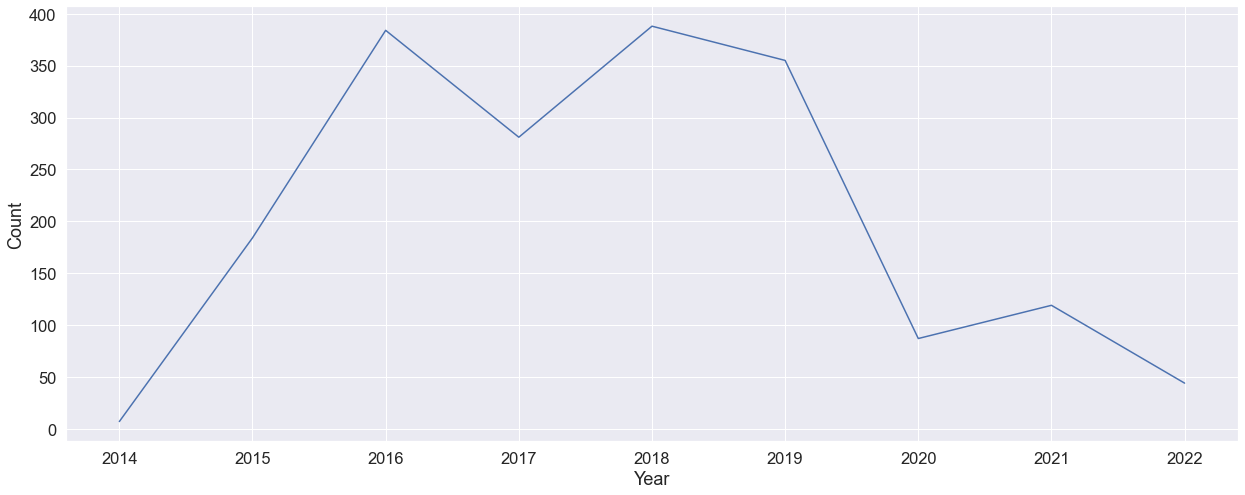

In [9]:
sns.lineplot(data = df.query("Region == 'Northern Africa'").groupby('Year', as_index = False).agg({'Main ID':'nunique'})\
.sort_values('Main ID', ascending = False).rename(columns = {'Main ID': 'Count'}), x = 'Year', y = 'Count')
#Распределение инцендентов в Северной Африке по годам

In [10]:
df.query("`Number of Children` > 0 & Region == 'Northern Africa'").groupby('Year')['Main ID'].nunique()
#Кол-во детей участников инцендента в Северной Африке по годам

Year
2015     1
2017    10
2018    85
2019    98
2020    13
2021    30
2022    11
Name: Main ID, dtype: int64

In [11]:
df.query("Region == 'Northern Africa' & Year == 2016").groupby('Reported Month', as_index = False).agg({'Total Number of Dead and Missing':'sum'}).sort_values('Total Number of Dead and Missing')

,Reported Month,Total Number of Dead and Missing
8,9,34
0,1,53
3,4,71
6,7,72
7,8,82
5,6,85
10,11,90
11,12,116
4,5,124
9,10,156


[Text(0.5, 0, 'Reported Month of 2016 Year'),
 Text(0, 0.5, 'Total Number of Dead and Missing')]

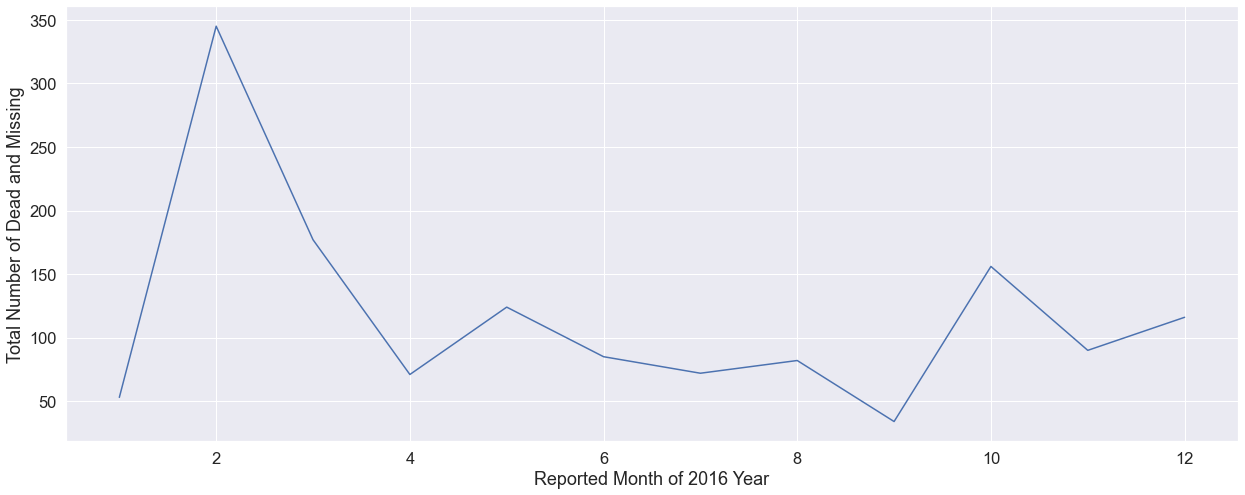

In [12]:
kx = sns.lineplot(data = df.query("Region == 'Northern Africa' & Year == 2016").groupby('Reported Month', as_index = False).agg({'Total Number of Dead and Missing':'sum'}),
x = 'Reported Month', y = 'Total Number of Dead and Missing')
kx.set(xlabel='Reported Month of 2016 Year', ylabel='Total Number of Dead and Missing')
#Распределение числа погибших и пропавших без вести за 2016 год

[Text(0.5, 0, 'Reported Month of 2018 Year'),
 Text(0, 0.5, 'Total Number of Dead and Missing')]

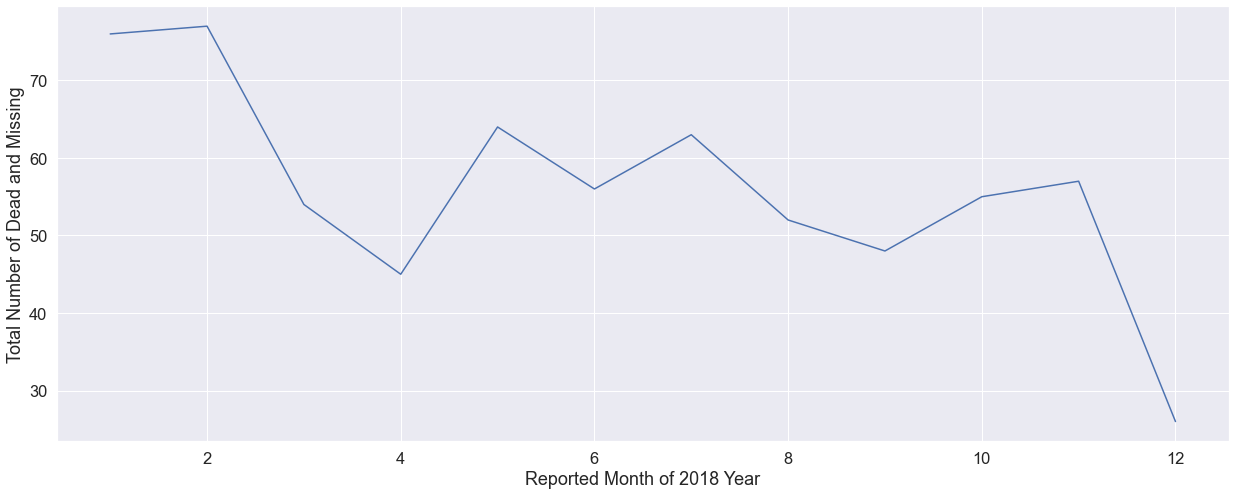

In [13]:
ax = sns.lineplot(data = df.query("Region == 'Northern Africa' & Year == 2018").groupby('Reported Month', as_index = False).agg({'Total Number of Dead and Missing':'sum'}),
x = 'Reported Month', y = 'Total Number of Dead and Missing')
ax.set(xlabel='Reported Month of 2018 Year', ylabel='Total Number of Dead and Missing')
#Распределение числа погибших и пропавших без вести за 2018 год

## Вывод:
Несмотря на сопоставимость кол-ва произошедших инцендентов в Северной Африке между 2016 и 2018 годом. В 2018 существенно снизилось число жертв и пропавших без вести в сравнению с 2016м годом.

In [14]:
ddf = df.query("Region == 'Northern Africa' & Year == 2016").groupby('Location of death',  as_index=False).agg({'Number Dead':'sum'}).sort_values('Number Dead', ascending = False)
ddf.head()
#Колличество смертей по местам произошедших инцентендов в Северной Африке в 2016м году

,Location of death,Number Dead
91,"Kurfrah, Libya",114.0
90,"Kufrah, Libya",98.0
166,"Unspecified location, Libya",67.0
12,"Aswan, Egypt",59.0
89,"Khartoum, Sudan",52.0


In [15]:
top5 = ddf['Location of death'].iloc[:6].to_list() #список топ 5 мест по жертвам
top5

['Kurfrah, Libya',
 'Kufrah, Libya',
 'Unspecified location, Libya',
 'Aswan, Egypt',
 'Khartoum, Sudan',
 'Sabha, Libya']

In [16]:
ndf = df.query("Region == 'Northern Africa' & Year == 2016 & `Location of death` == @top5").groupby(['Location of death','Reported Month']).agg({'Number Dead':'sum'})
ndf = ndf.replace('Kurfrah, Libya','Kufrah, Libya')
ndf.head()

# Колличество смертей в 2016м году по месяцам и местам

Number Dead
Location of death Reported Month             
Aswan, Egypt      1                       4.0
                  2                       1.0
                  3                       1.0
                  4                       2.0
                  8                       3.0

[Text(0.5, 0, 'Reported Month of 2016 Year'), Text(0, 0.5, 'Number Dead')]

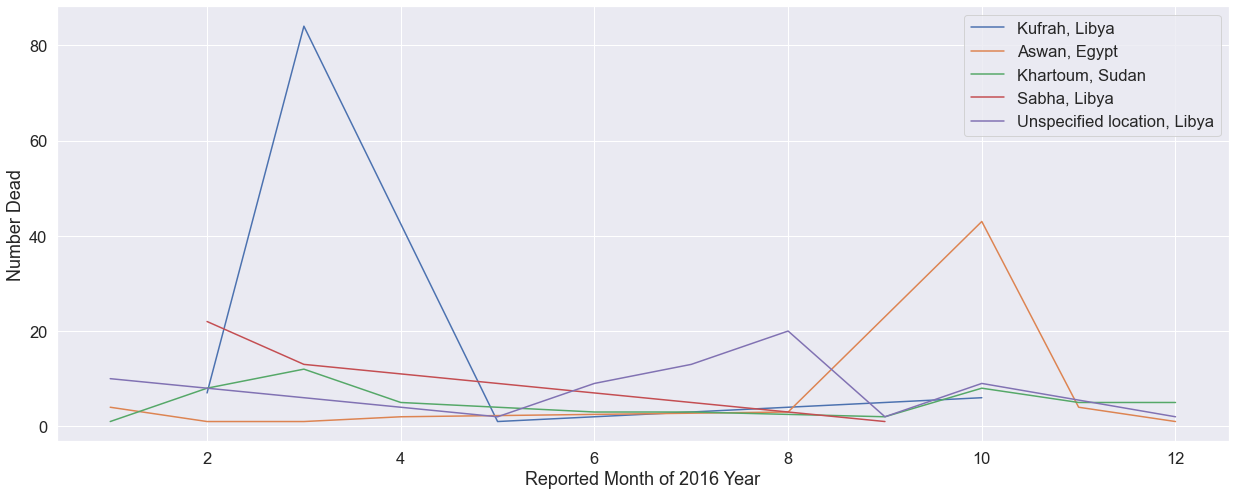

In [17]:
dx =sns.lineplot(data = ndf.query("`Location of death` == 'Kufrah, Libya'"), x = 'Reported Month', y = 'Number Dead')
sns.lineplot(data = ndf.query("`Location of death` == 'Aswan, Egypt'"), x = 'Reported Month', y = 'Number Dead')
sns.lineplot(data = ndf.query("`Location of death` == 'Khartoum, Sudan'"), x = 'Reported Month', y = 'Number Dead')
sns.lineplot(data = ndf.query("`Location of death` == 'Sabha, Libya'"), x = 'Reported Month', y = 'Number Dead')
sns.lineplot(data = ndf.query("`Location of death` == 'Unspecified location, Libya'"), x = 'Reported Month', y = 'Number Dead')
plt.legend(labels=["Kufrah, Libya","Aswan, Egypt", "Khartoum, Sudan", "Sabha, Libya", "Unspecified location, Libya"])
dx.set(xlabel='Reported Month of 2016 Year', ylabel='Number Dead')
#Число смертей по местам региона Северной Африки по месяцам за 2016й год

In [18]:
md= ndf.query("`Location of death` == 'Kufrah, Libya' ")['Number Dead'].max()
ndf.query("`Location of death` == 'Kufrah, Libya' & `Number Dead` == @md ")


,,Number Dead
Location of death,Reported Month,
"Kufrah, Libya",3,84.0


### В Марте 2016года произошло в Куфре произошло больше всего гибелей мигрантов в 2016м году в регионе Северная Африка, также виден пик на октябре в городе Асван

In [19]:
vdf = df.query("Region == 'Northern Africa' & Year == 2016 & `Location of death` == @top5").groupby(['Cause of Death','Reported Month', 'Location of death' ]).agg({'Number Dead':'sum'})

In [20]:
vdf = vdf.replace('Kurfrah, Libya','Kufrah, Libya')

In [21]:
vdf.query("`Location of death` == 'Kufrah, Libya' & `Reported Month` == 3 ")
#Распределение причин смерти в Куфре в Марте 2016 года

,,,Number Dead
Cause of Death,Reported Month,Location of death,
Mixed or unknown,3,"Kufrah, Libya",24.0
Sickness / lack of access to adequate healthcare,3,"Kufrah, Libya",30.0
Vehicle accident / death linked to hazardous transport,3,"Kufrah, Libya",30.0


[Text(0.5, 0, 'Number Dead at March 2016 in Kufrah, Libya'),
 Text(0, 0.5, 'Cause of Dead')]

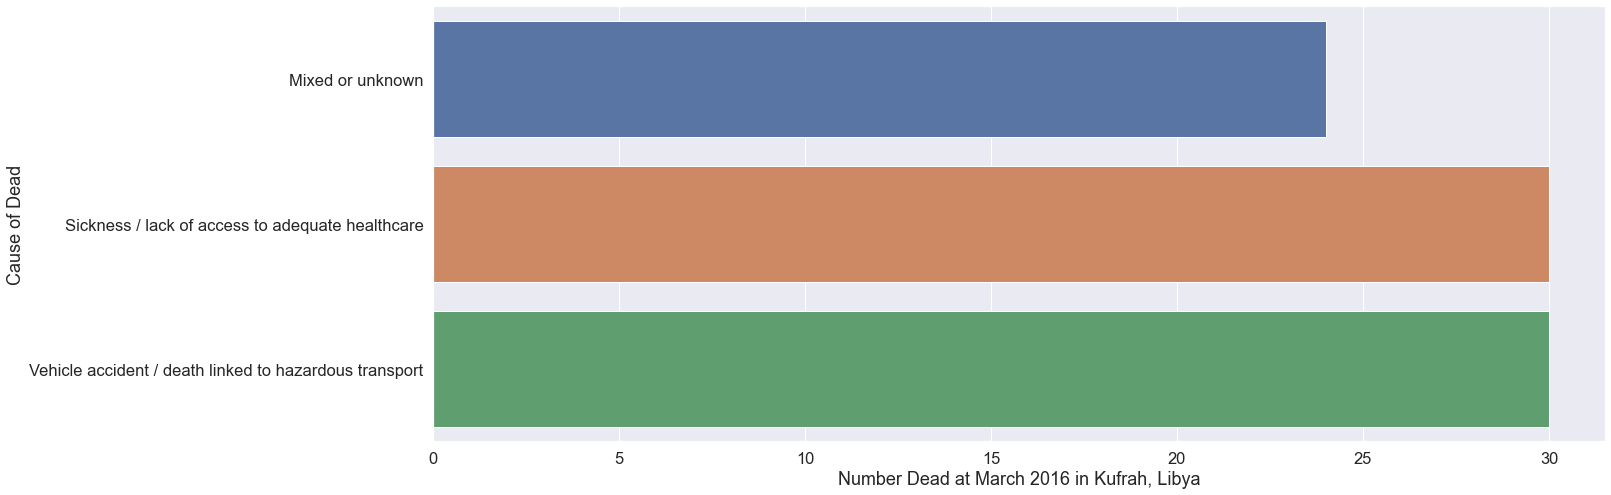

In [22]:
px = sns.barplot(x="Number Dead", y="Cause of Death", data=vdf.query("`Location of death` == 'Kufrah, Libya' & `Reported Month` == 3 ").reset_index())
px.set(xlabel='Number Dead at March 2016 in Kufrah, Libya', ylabel='Cause of Dead')
#Распределение причин смерти мигрантов в Куфре в Марте 2016 года

In [23]:
vdf.query("`Location of death` == 'Aswan, Egypt' & `Reported Month` == 10 ")
#Распределение причин смерти в Асване в откябре 2016 года

,,,Number Dead
Cause of Death,Reported Month,Location of death,
Sickness / lack of access to adequate healthcare,10,"Aswan, Egypt",12.0
Vehicle accident / death linked to hazardous transport,10,"Aswan, Egypt",31.0


[Text(0.5, 0, 'Number Dead at March 2016 in Aswan, Egypt'),
 Text(0, 0.5, 'Cause of Dead')]

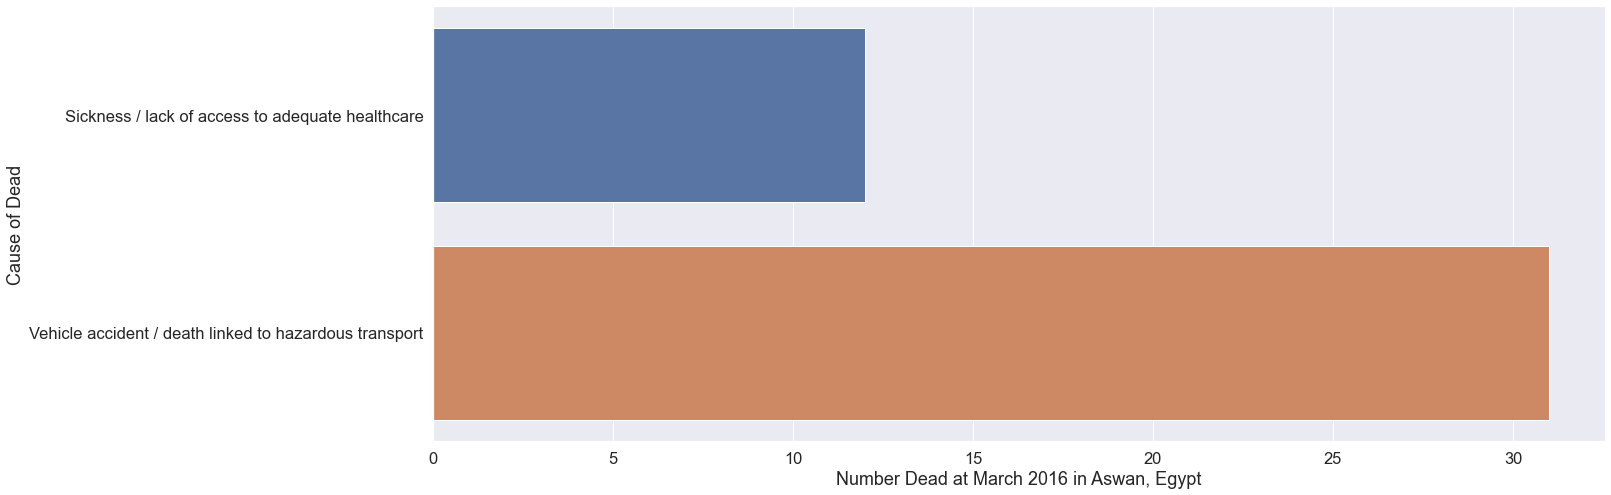

In [24]:
px = sns.barplot(x="Number Dead", y="Cause of Death", data=vdf.query("`Location of death` == 'Aswan, Egypt' & `Reported Month` == 10 ").reset_index())
px.set(xlabel='Number Dead at March 2016 in Aswan, Egypt', ylabel='Cause of Dead')
#Распределение причин смерти в Асване в откябре 2016 года

In [25]:
df18 = df.query("Region == 'Northern Africa' & Year == 2018").groupby('Location of death',  as_index=False).agg({'Number Dead':'sum'}).sort_values('Number Dead', ascending = False)
df18.head()
#Колличество смертей по местам произошедших инцентендов в Северной Африке в 2018м году

,Location of death,Number Dead
39,"Sahara desert, Libya",121.0
52,"Unspecified location in the Sahara Desert, Libya",59.0
56,"Unspecified location in the Sahara desert, Sudan",58.0
33,"Sabha, Libya",50.0
41,"Sahara desert, Sudan, near the border with Egypt",47.0


In [26]:
tp = df18['Location of death'].iloc[:6].to_list() #список топ 5 мест по жертвам

In [27]:
ndf18 = df.query("`Location of death` == @tp & Region == 'Northern Africa' & Year == 2018").groupby(['Location of death','Reported Month'], as_index = False).agg({'Number Dead':'sum'})
ndf18 = ndf18.replace('Unspecified location in the Sahara Desert, Libya','Sahara desert, Libya')
# Колличество смертей в 2018м году по месяцам и местам

[Text(0.5, 0, 'Reported Month of 2018 Year'), Text(0, 0.5, 'Number Dead')]

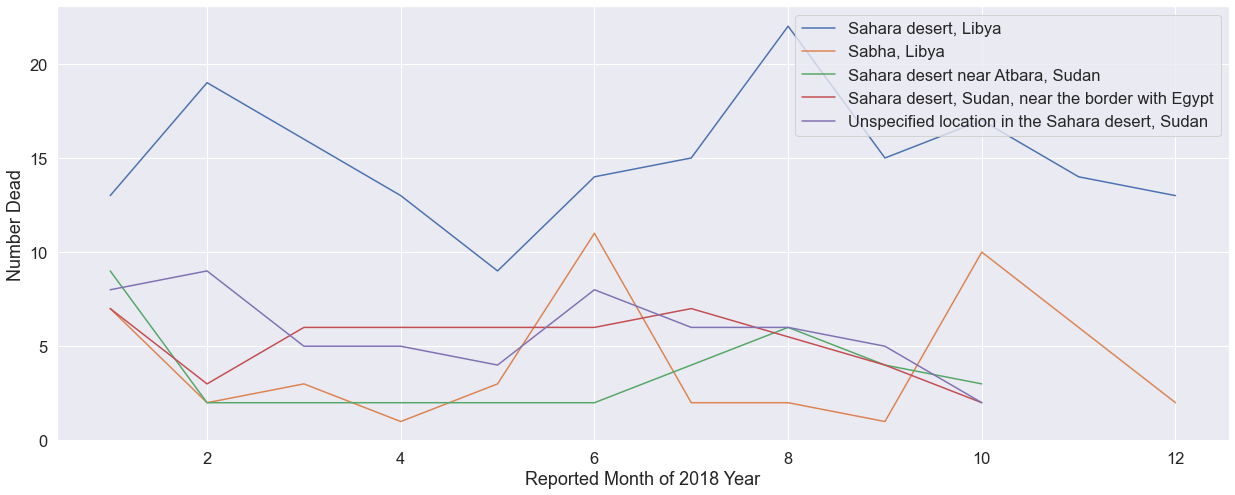

In [28]:
wx =sns.lineplot(data = ndf18.query("`Location of death` == 'Sahara desert, Libya'"), x = 'Reported Month', y = 'Number Dead')
sns.lineplot(data = ndf18.query("`Location of death` == 'Sabha, Libya'"), x = 'Reported Month', y = 'Number Dead')
sns.lineplot(data = ndf18.query("`Location of death` == 'Sahara desert near Atbara, Sudan'"), x = 'Reported Month', y = 'Number Dead')
sns.lineplot(data = ndf18.query("`Location of death` == 'Sahara desert, Sudan, near the border with Egypt'"), x = 'Reported Month', y = 'Number Dead')
sns.lineplot(data = ndf18.query("`Location of death` == 'Unspecified location in the Sahara desert, Sudan'"), x = 'Reported Month', y = 'Number Dead')
plt.legend(labels=["Sahara desert, Libya","Sabha, Libya", "Sahara desert near Atbara, Sudan", "Sahara desert, Sudan, near the border with Egypt", "Unspecified location in the Sahara desert, Sudan"])
wx.set(xlabel='Reported Month of 2018 Year', ylabel='Number Dead')
#Число смертей по местам региона Северной Африки по месяцам за 2018й год

### В Августе 2018 года  в Пустыне Сахара произошло больше всего гибелей мигрантов в 2018м году в регионе Северная Африка. Ни одно из мест бывших лидерами по числу гибелей в 2016 году не появилось в топ 5 в 2018. В целом ситуация явно улучшилась как за год в общем, так и по месяцам

In [29]:
sahdf = df.query("Region == 'Northern Africa' & Year == 2018 & `Location of death` == @tp").groupby(['Cause of Death','Reported Month', 'Location of death' ]).agg({'Number Dead':'sum'})

In [30]:
sahdf = sahdf.replace('Unspecified location in the Sahara Desert, Libya','Sahara desert, Libya')

In [31]:
sahdf.query("`Location of death` == 'Sahara desert, Libya' & `Reported Month` == 3 ")
#Распределение причин смерти в Куфре в Марте 2016 года

,,,Number Dead
Cause of Death,Reported Month,Location of death,
"Harsh environmental conditions / lack of adequate shelter, food, water",3,"Sahara desert, Libya",5.0
Mixed or unknown,3,"Sahara desert, Libya",7.0
Sickness / lack of access to adequate healthcare,3,"Sahara desert, Libya",3.0
Vehicle accident / death linked to hazardous transport,3,"Sahara desert, Libya",1.0


[Text(0.5, 0, 'Number Dead at Jctober 2018 in Sahara Desert, Libya'),
 Text(0, 0.5, 'Cause of Dead')]

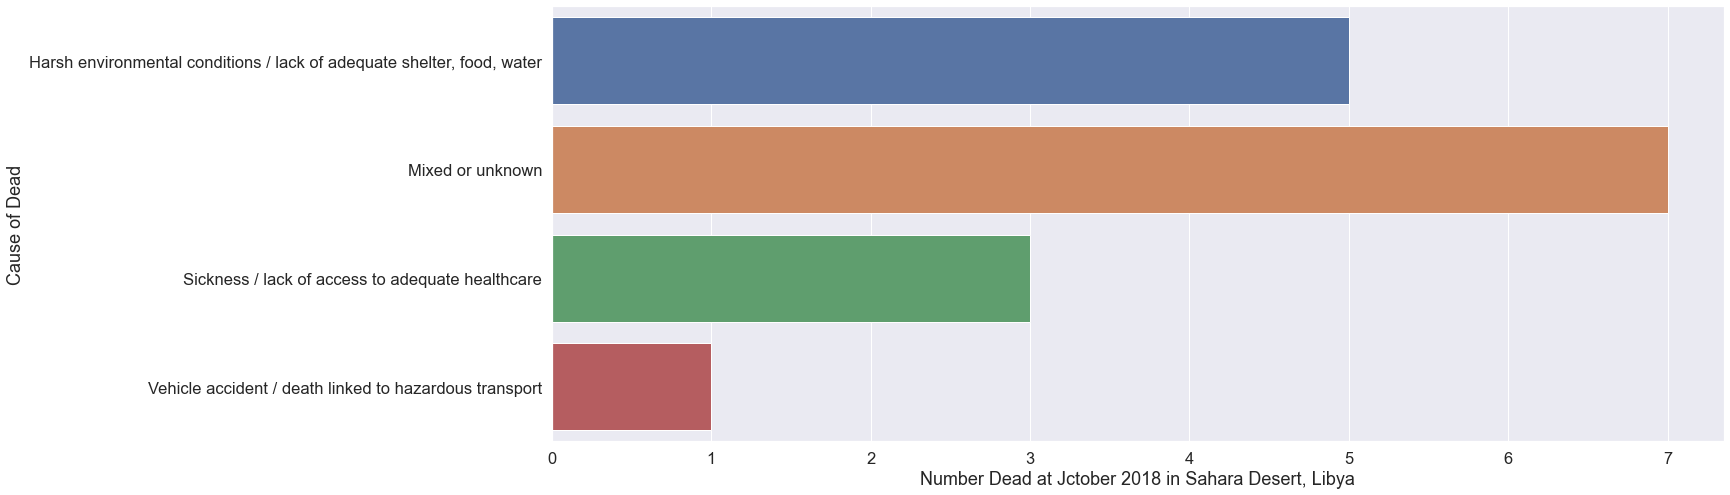

In [32]:
ex = sns.barplot(x="Number Dead", y="Cause of Death", data=sahdf.query("`Location of death` == 'Sahara desert, Libya' & `Reported Month` == 3 ").reset_index())
ex.set(xlabel='Number Dead at Jctober 2018 in Sahara Desert, Libya', ylabel='Cause of Dead')
#Распределение причин смерти мигрантов в Сахаре в октябре 2018 года

## A/B тест среднего кол-ва жертв мужчин и женщин среди всех инцендентов в Северной Африке в 2018 г

In [33]:
{'meanMale' : df.query("Region == 'Northern Africa' & Year == 2018")['Number of Males'].fillna(0).mean(), 'meanFemale': df.query("Region == 'Northern Africa' & Year == 2018")['Number of Females'].fillna(0).mean()}
#Среднее кол-во жертв мужчин и женщин

{'meanMale': 0.7680412371134021, 'meanFemale': 0.6288659793814433}

In [34]:
(0.7680412371134021 - 0.6288659793814433) / 0.6288659793814433 * 100

22.131147540983616

In [35]:
ss.normaltest(df.query("Region == 'Northern Africa' & Year == 2018")['Number of Males'].fillna(0))
#ненормальное распределение

NormaltestResult(statistic=541.4900953006387, pvalue=2.6116790351265686e-118)

In [36]:
ss.normaltest(df.query("Region == 'Northern Africa' & Year == 2018")['Number of Females'].fillna(0))
#ненормальное распределение

NormaltestResult(statistic=849.4342382648382, pvalue=3.52938301181162e-185)

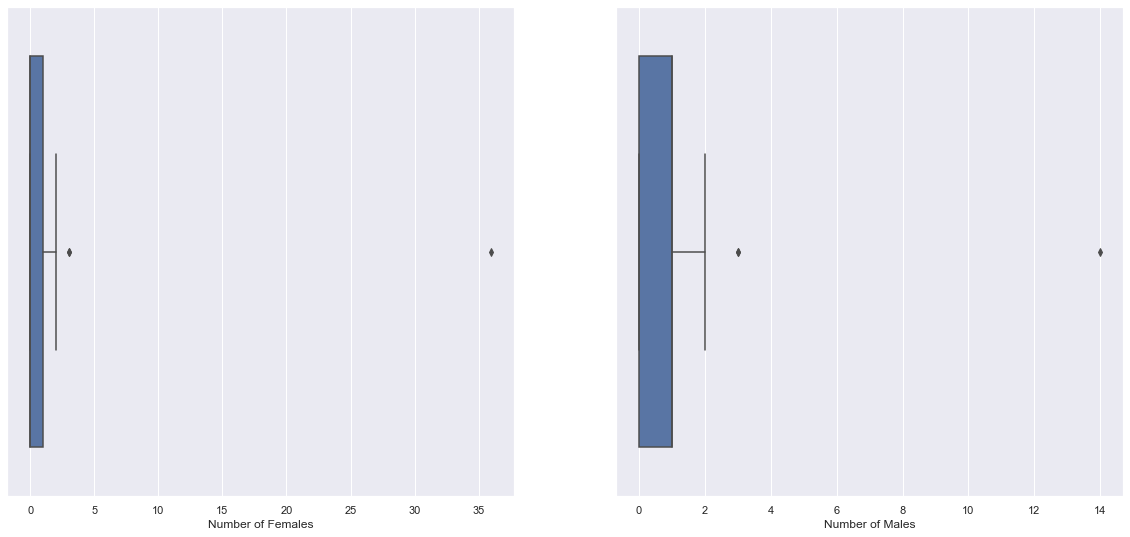

In [99]:
fig, ax =plt.subplots(1,2)
sns.boxplot(df.query("Region == 'Northern Africa' & Year == 2018")['Number of Females'].fillna(0),ax=ax[0] )
sns.boxplot(df.query("Region == 'Northern Africa' & Year == 2018")['Number of Males'].fillna(0), ax=ax[1])
sns.set(rc={'figure.figsize':(20,9)})
fig.show()  
#Распределение жертв мужчин и женщин

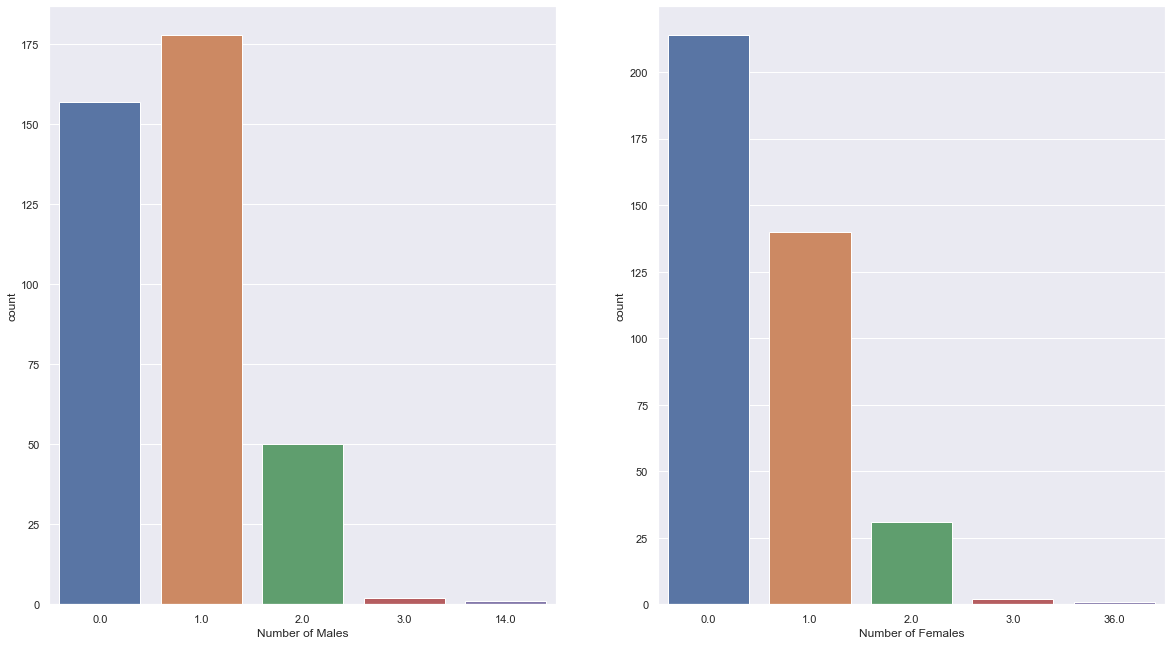

In [97]:
fig, ax =plt.subplots(1,2)
sns.countplot(df.query("Region == 'Northern Africa' & Year == 2018")['Number of Males'].fillna(0), ax=ax[0])
sns.countplot(df.query("Region == 'Northern Africa' & Year == 2018")['Number of Females'].fillna(0), ax=ax[1])
fig.show()  
#Распределение числа инцендентов с погибшими мужчинами и женщинами

### В обоих случаях в данных наблюдаются выбросы

In [39]:
ss.mannwhitneyu(df.query("Region == 'Northern Africa' & Year == 2018")['Number of Males'].fillna(0),
            df.query("Region == 'Northern Africa' & Year == 2018")['Number of Females'].fillna(0))

MannwhitneyuResult(statistic=86985.0, pvalue=3.460454746409706e-05)

### Для теста с ненормально распределенными данными был использован непараметрический U-критерий Манна-Уитни. С результатом U = 86985.0,  p = 3.460454746409706e-05 можно интерпретировать что нулевая гипотеза о равенстве средних между распределениями отклонена.
## На 22% число мужчин, ставших жертвами инцендентов в регионе Северная Африка в 2018г, выше чем число женщин